### Introduction to TensorFlow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.3.0


In [3]:
hello = tf.constant("Hello ")

In [4]:
world = tf.constant("World")

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [6]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


### Initiate a Tensor Flow Session

In [7]:
with tf.Session() as sess:
    result = sess.run(hello+world)
    

In [8]:
print(result)

b'Hello World'


In [9]:
a = tf.constant(10)
b = tf.constant(20)

In [10]:
a + b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [11]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [12]:
result

30

In [13]:
const = tf.constant(10)

fill_mat = tf.fill((4,4), 10)

myzeros= tf.zeros((4,4))

myones = tf.ones((4,4))

myrandn = tf.random_normal((4,4), mean=0, stddev=1.0)

myrandu = tf.random_uniform((4,4), minval=0, maxval=1)

In [14]:
# does not return anything yet
myzeros

<tf.Tensor 'zeros:0' shape=(4, 4) dtype=float32>

In [15]:
my_ops = [const,fill_mat,myzeros,myones,myrandn, myrandu]

In [16]:
sess = tf.InteractiveSession()

In [17]:
for op in my_ops:
    print(sess.run(op))

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ -1.84854940e-01  -1.44433510e+00   9.45562601e-01   1.13655722e+00]
 [ -4.06628460e-01  -8.64454627e-01   8.91076922e-01   8.79978895e-01]
 [ -1.16106617e+00  -8.28784599e-04  -3.08207959e-01  -2.59252544e-02]
 [  4.86872718e-02   3.46834183e-01   1.41540205e+00   2.62965620e-01]]
[[ 0.44518805  0.49903512  0.3104068   0.53267598]
 [ 0.14184749  0.73758292  0.21299613  0.52609253]
 [ 0.9815383   0.55398047  0.03235614  0.46881032]
 [ 0.15254509  0.95993495  0.51051319  0.21845448]]


In [18]:
# alternative quick and dirty
for op in my_ops:
    print(op.eval())

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ -8.23388696e-01  -8.67374718e-01   6.29371524e-01   2.24682942e-01]
 [  1.25571340e-01   1.03841996e+00   6.00760639e-01   1.10363519e+00]
 [  1.46576405e+00   9.01778489e-02  -1.95554757e+00   1.00885606e+00]
 [  5.50995648e-01   5.64218402e-01  -4.15505469e-01  -8.87017464e-04]]
[[ 0.86945713  0.85929179  0.69921029  0.28959215]
 [ 0.80800319  0.60149622  0.65895057  0.10923958]
 [ 0.27838063  0.97462189  0.80778325  0.17725003]
 [ 0.44487453  0.97814298  0.55137479  0.17463136]]


In [19]:
a = tf.constant([[1,2],[3,4]])

In [20]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [21]:
b = tf.constant([[10],[100]])
result = tf.matmul(a,b)

In [22]:
# it runs because we have defined the tf.InteractiveSession()
sess.run(result)

array([[210],
       [430]])

In [23]:
result.eval()

array([[210],
       [430]])

## TensorFlow Graphs

In [24]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2

In [25]:
sess.run(n3)

3

In [26]:
print(tf.get_default_graph)

<function get_default_graph at 0x00000000079786A8>


In [27]:
g = tf.Graph()

In [28]:
print(g)

In [29]:
graph_one = tf.get_default_graph()

In [30]:
print(graph_one)

In [31]:
graph_two = tf.Graph()

In [32]:
print(graph_two)

In [33]:
# set it as default

with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [34]:
my_tensor = tf.random_uniform((4,4),0,1)

In [35]:
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [36]:
my_var = tf.Variable(initial_value=my_tensor)
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [37]:
# I will get an error because i have not initialized it
#sess.run(my_var)

In [38]:
init =tf.global_variables_initializer()
sess.run(init)
sess.run(my_var)

array([[ 0.21275818,  0.63380682,  0.13578355,  0.05205882],
       [ 0.45209968,  0.95884287,  0.03586781,  0.74996364],
       [ 0.41161346,  0.22662508,  0.57397532,  0.59693325],
       [ 0.01978922,  0.31103253,  0.33865094,  0.55903494]], dtype=float32)

In [39]:
# placeholders

ph = tf.placeholder(tf.float32, shape = (None,5))

# A Neural Network

In [40]:
import numpy as np
import tensorflow as tf

In [41]:
np.random.seed(101)
tf.set_random_seed(101)

rand_a = np.random.uniform(0,100, (5,5))
rand_b = np.random.uniform(0,100, (5,1))

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

add_op = a + b
mul_op = a * b

In [42]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mult_result = sess.run(mul_op, feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


### An example of Neural Network

In [43]:
n_features = 10
n_dense_neurons = 3

# rows is the number of observations
x = tf.placeholder(tf.float32, (None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [44]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)

# activation function
a = tf.sigmoid(z)

In [45]:
# initialize the variables
init=tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [46]:
print(layer_out)

[[ 0.21292764  0.6340282   0.82990938]]


### Simple Regression Example

In [47]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [48]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [49]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

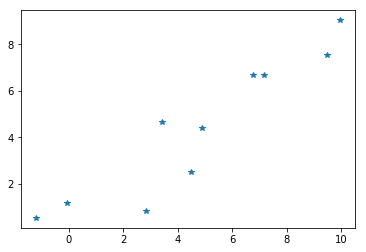

In [51]:
plt.plot(x_data, y_label, "*")

y = mx + b

In [52]:
# set two random numbers
m = tf.Variable(0.44)
b = tf.Variable(0.87)

error = 0

for x,y in zip(x_data,y_label):
    
    y_hat=m*x+b
    
    error = error+ (y-y_hat)**2
    

In [53]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# since i want to minimize the error
train = optimizer.minimize(error)

In [54]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [55]:
final_slope

0.75350869

In [56]:
final_intercept

0.83729243

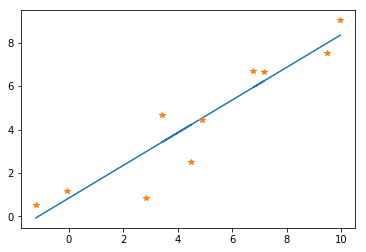

In [57]:
y_pred = final_slope*x_data+final_intercept


plt.plot(x_data, y_pred)
plt.plot(x_data, y_label, "*")

### A more realistic regression example using tf.estimator

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [59]:
x_data = np.linspace(0,10,1000000)
noise = np.random.randn(len(x_data))

In [60]:
# y = mx+b, b=5

y_true = (0.5*x_data)+5+noise

In [61]:
x_df = pd.DataFrame(x_data, columns=['X Data'])
y_df = pd.DataFrame(y_true, columns=['Y'])
my_data = pd.concat([x_df,y_df], axis=1)

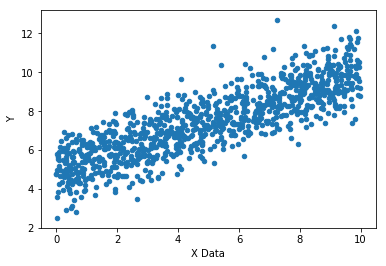

In [62]:
my_data.sample(n=1000).plot(kind='scatter', x='X Data', y= 'Y')

In [63]:
# run the algorithm in batches
batch_size = 8

# assign two random numbers for m and b
m=tf.Variable(0.5)
b=tf.Variable(1.0)

# define the placeholders

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [64]:
y_model = m*xph+b #this is the graph

# minimize the square error
error = tf.reduce_sum(tf.square(yph-y_model))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

In [65]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        # we will run 10000 times (batches) the model where each time we get 8 data points (batch size)
        # we pich the 8 points randomly
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [66]:
model_m

0.47561312

In [67]:
model_b

4.9608874

#### Estimator API

In [68]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [69]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\gpipis\\AppData\\Local\\Temp\\tmpjy57y1mr', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1}


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [72]:
print(x_train.shape)

(700000,)


In [73]:
x_eval.shape

(300000,)

In [74]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [75]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [76]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [77]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\gpipis\AppData\Local\Temp\tmpjy57y1mr\model.ckpt.
INFO:tensorflow:loss = 487.804, step = 1
INFO:tensorflow:global_step/sec: 961.467
INFO:tensorflow:loss = 26.3515, step = 101 (0.114 sec)
INFO:tensorflow:global_step/sec: 812.944
INFO:tensorflow:loss = 18.8811, step = 201 (0.113 sec)
INFO:tensorflow:global_step/sec: 934.493
INFO:tensorflow:loss = 27.5149, step = 301 (0.109 sec)
INFO:tensorflow:global_step/sec: 833.27
INFO:tensorflow:loss = 11.2148, step = 401 (0.118 sec)
INFO:tensorflow:global_step/sec: 1020.31
INFO:tensorflow:loss = 27.6054, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 847.392
INFO:tensorflow:loss = 8.44898, step = 601 (0.116 sec)
INFO:tensorflow:global_step/sec: 925.834
INFO:tensorflow:loss = 12.2545, step = 701 (0.111 sec)
INFO:tensorflow:global_step/sec: 826.363
INFO:tensorflow:loss = 17.1469, step = 801 (0.120 sec)
INFO:tensorflow:global_step/sec: 952.286
IN

In [78]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-24-15:24:12
INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmpjy57y1mr\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [79]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-24-15:24:18
INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmpjy57y1mr\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [80]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0860816, 'loss': 8.688653, 'global_step': 1000}


In [81]:
print('EVAL DATA METRICS')
print(eval_metrics)

EVAL DATA METRICS
{'average_loss': 1.0830207, 'loss': 8.6641655, 'global_step': 1000}


In [82]:
# Predict new values

brand_new_data = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [83]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmpjy57y1mr\model.ckpt-1000


[{'predictions': array([ 4.42434406], dtype=float32)},
 {'predictions': array([ 5.07194328], dtype=float32)},
 {'predictions': array([ 5.71954298], dtype=float32)},
 {'predictions': array([ 6.3671422], dtype=float32)},
 {'predictions': array([ 7.0147419], dtype=float32)},
 {'predictions': array([ 7.66234112], dtype=float32)},
 {'predictions': array([ 8.30994034], dtype=float32)},
 {'predictions': array([ 8.95753956], dtype=float32)},
 {'predictions': array([ 9.60513878], dtype=float32)},
 {'predictions': array([ 10.25273895], dtype=float32)}]

In [84]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmpjy57y1mr\model.ckpt-1000


In [85]:
predictions

[array([ 4.42434406], dtype=float32),
 array([ 5.07194328], dtype=float32),
 array([ 5.71954298], dtype=float32),
 array([ 6.3671422], dtype=float32),
 array([ 7.0147419], dtype=float32),
 array([ 7.66234112], dtype=float32),
 array([ 8.30994034], dtype=float32),
 array([ 8.95753956], dtype=float32),
 array([ 9.60513878], dtype=float32),
 array([ 10.25273895], dtype=float32)]

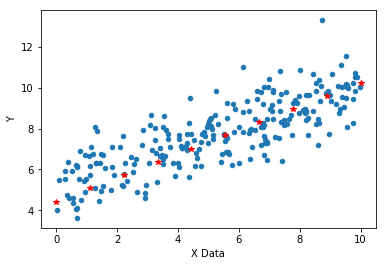

In [86]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, "r*")

### Classification Example

In [87]:
import pandas as pd

In [103]:
diabetes = pd.read_csv('02-TensorFlow-Basics\pima-indians-diabetes.csv')

In [104]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [105]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [106]:
# columns to normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [107]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()) )

In [108]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [109]:
import tensorflow as tf
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [110]:
# Numerical Variables
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [112]:
# Categorical Variables - Two ways
# EG Vocab list
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

#EG  hash bucket
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
# the bucket size can be as big as you want, minimum is the number of levels  - in this case 4

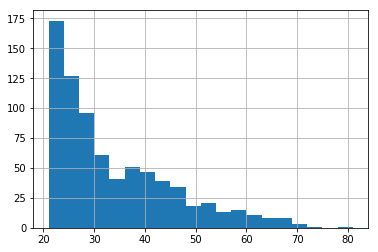

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

diabetes['Age'].hist(bins=20)

In [114]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

In [115]:
feat_cols = [num_preg, plasma_gluc, dias_press, triceps, insulin, bmi, diabetes_pedigree,assigned_group, age_bucket]

In [116]:
# train test split

In [117]:
x_data = diabetes.drop('Class', axis=1)

In [118]:
labels = diabetes['Class']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [120]:
#create an input function

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [121]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\gpipis\\AppData\\Local\\Temp\\tmplk0uib__', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1}


In [122]:
model.train(input_fn=input_func, steps =1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\gpipis\AppData\Local\Temp\tmplk0uib__\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 346.009
INFO:tensorflow:loss = 4.02263, step = 101 (0.304 sec)
INFO:tensorflow:global_step/sec: 341.283
INFO:tensorflow:loss = 4.68397, step = 201 (0.278 sec)
INFO:tensorflow:global_step/sec: 340.117
INFO:tensorflow:loss = 6.28098, step = 301 (0.294 sec)
INFO:tensorflow:global_step/sec: 386.082
INFO:tensorflow:loss = 6.09891, step = 401 (0.282 sec)
INFO:tensorflow:global_step/sec: 353.345
INFO:tensorflow:loss = 4.94206, step = 501 (0.260 sec)
INFO:tensorflow:global_step/sec: 367.636
INFO:tensorflow:loss = 6.96339, step = 601 (0.282 sec)
INFO:tensorflow:global_step/sec: 387.581
INFO:tensorflow:loss = 6.09563, step = 701 (0.258 sec)
INFO:tensorflow:global_step/sec: 384.598
INFO:tensorflow:loss = 5.0075, step = 801 (0.260 sec)
INFO:tensorflow:global_step/sec: 392.142
IN

In [123]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [124]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-04-24-16:21:14
INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmplk0uib__\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-04-24-16:21:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.802716, auc_precision_recall = 0.649286, average_loss = 0.524577, global_step = 1000, label/mean = 0.350649, loss = 5.04906, prediction/mean = 0.368528


In [125]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80271602,
 'auc_precision_recall': 0.64928591,
 'average_loss': 0.52457726,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0490565,
 'prediction/mean': 0.36852771}

In [126]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [127]:
predictions = model.predict(pred_input_func)

In [128]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmplk0uib__\model.ckpt-1000


In [129]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54491156], dtype=float32),
  'logits': array([ 0.18013167], dtype=float32),
  'probabilities': array([ 0.45508847,  0.54491156], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63534439], dtype=float32),
  'logits': array([ 0.55521381], dtype=float32),
  'probabilities': array([ 0.36465561,  0.63534439], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.38299534], dtype=float32),
  'logits': array([-0.47685385], dtype=float32),
  'probabilities': array([ 0.61700469,  0.38299534], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34539193], dtype=float32),
  'logits': array([-0.63935685], dtype=float32),
  'probabilities': array([ 0.65460807,  0.34539193], dtype=flo

In [132]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\gpipis\\AppData\\Local\\Temp\\tmpzskdn0gk', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1}


In [133]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [134]:
feat_cols = [num_preg, plasma_gluc, dias_press, triceps, insulin, bmi, diabetes_pedigree,embedded_group_col, age_bucket]

In [135]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [136]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\gpipis\\AppData\\Local\\Temp\\tmplrp__yqs', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1}


In [137]:
dnn_model.train(input_fn=input_func , steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\gpipis\AppData\Local\Temp\tmplrp__yqs\model.ckpt.
INFO:tensorflow:loss = 9.1394, step = 1
INFO:tensorflow:global_step/sec: 229.335
INFO:tensorflow:loss = 6.92933, step = 101 (0.442 sec)
INFO:tensorflow:global_step/sec: 242.107
INFO:tensorflow:loss = 4.49818, step = 201 (0.421 sec)
INFO:tensorflow:global_step/sec: 197.609
INFO:tensorflow:loss = 4.82911, step = 301 (0.500 sec)
INFO:tensorflow:global_step/sec: 258.372
INFO:tensorflow:loss = 5.50831, step = 401 (0.392 sec)
INFO:tensorflow:global_step/sec: 243.878
INFO:tensorflow:loss = 11.2943, step = 501 (0.414 sec)
INFO:tensorflow:global_step/sec: 182.131
INFO:tensorflow:loss = 4.88156, step = 601 (0.551 sec)
INFO:tensorflow:global_step/sec: 204.898
INFO:tensorflow:loss = 6.85315, step = 701 (0.481 sec)
INFO:tensorflow:global_step/sec: 222.2
INFO:tensorflow:loss = 5.09415, step = 801 (0.449 sec)
INFO:tensorflow:global_step/sec: 205.741
INFO

In [140]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [141]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-04-24-16:37:50
INFO:tensorflow:Restoring parameters from C:\Users\gpipis\AppData\Local\Temp\tmplrp__yqs\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-04-24-16:37:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.81786, auc_precision_recall = 0.687238, average_loss = 0.504409, global_step = 1000, label/mean = 0.350649, loss = 4.85494, prediction/mean = 0.317077


{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81786013,
 'auc_precision_recall': 0.68723768,
 'average_loss': 0.5044089,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8549356,
 'prediction/mean': 0.31707665}